# House Price Analysis in India

# Table of Contents

1. [Introduction](#Introduction)
2. [Loading and Inspecting the Data](#Loading-and-Inspecting-the-Data)
3. [Data Cleaning Recap](#Data-Cleaning-Recap)
4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
   - [Distribution of Target Variable](#Distribution-of-Target-Variable)
   - [Univariate Analysis of Features](#Univariate-Analysis-of-Features)
   - [Correlation Analysis](#Correlation-Analysis)
   - [Bivariate Analysis](#Bivariate-Analysis)
5. [Feature Engineering](#Feature-Engineering)
6. [Statistical Testing](#Statistical-Testing)
   - [Hypothesis Testing for Correlations](#Hypothesis-Testing-for-Correlations)
   - [Confidence Intervals](#Confidence-Intervals)
7. [Initial Regression Modeling](#Initial-Regression-Modeling)
8. [Model Diagnostics](#Model-Diagnostics)
   - [Residuals vs Fitted Values](#Residuals-vs-Fitted-Values)
   - [Q-Q Plot](#Q-Q-Plot)
   - [Variance Inflation Factor (VIF)](#Variance-Inflation-Factor-VIF)
   - [Cook's Distance](#Cooks-Distance)
9. [Conclusion](#Conclusion)
10. [References](#References)

<a id='Introduction'></a>
## Introduction

The Indian real estate market has experienced substantial growth over the past decade, influenced by factors such as urbanization, economic development, and increasing disposable incomes. Understanding the determinants of house prices is essential for various stakeholders, including policymakers, investors, and homebuyers. This analysis aims to identify the key factors that influence house prices in India and develop a predictive model to estimate future prices based on these determinants.

**Objectives:**
- Identify the main determinants of house prices in India.
- Analyze the relationships between various features (e.g., number of bedrooms, living area, location) and house prices.
- Develop a predictive model to estimate house prices based on selected features.


<a id='Loading-and-Inspecting-the-Data'></a>
## Loading and Inspecting the Data

Before diving into analysis, it's crucial to load the cleaned dataset and perform initial inspections to understand its structure and contents. This step ensures that the data is correctly loaded and provides insights into its basic characteristics.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting aesthetics
%matplotlib inline
sns.set(style='whitegrid')

# Define the path to the cleaned data
clean_data_path = '../data/House Price India_clean.csv'

# Load the cleaned data into a DataFrame
df = pd.read_csv(clean_data_path)

# Display the first five rows of the DataFrame
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,House_Age,Time_Since_Renovation,Total_Area
0,0.740964,0.539904,0.998686,-0.923001,-0.004305,-0.087866,-0.304128,2.370071,0.377804,0.163468,...,0.690494,-0.467051,0.684979,-0.335939,-0.014982,-1.561292,1400000,2.099975,2.233025,0.998686
1,1.915246,0.887737,0.986856,0.139543,-0.004305,-0.087866,-0.304128,-0.651080,0.377804,1.458453,...,0.671588,-0.452898,1.365099,-0.236162,-1.238547,-1.337474,1200000,1.082707,1.194558,0.986856
2,0.740964,0.539904,1.460046,2.079316,0.921239,-0.087866,-0.304128,-0.651080,1.375385,1.976448,...,1.166059,0.587292,1.958395,1.154832,1.208583,1.236435,838000,-1.019648,-0.951607,1.460046
3,-0.433317,-0.155762,0.750261,-0.826054,-0.004305,-0.087866,-0.304128,0.859496,0.377804,0.124618,...,0.813385,-0.573192,0.091683,-0.316751,-1.238547,-1.561292,805000,1.421796,1.540713,0.750261
4,-0.433317,0.539904,0.620134,-0.777580,-0.929849,-0.087866,-0.304128,0.859496,1.375385,-0.108479,...,0.875921,-1.316186,0.554744,-0.307157,-1.238547,0.229253,790000,0.675799,0.779171,0.620134


The dataset comprises various features related to house properties in India. The target variable is `Price`, representing the house price in local currency units. Below is a summary of the dataset's structure.

In [3]:
# Display data types and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14619 non-null  float64
 1   number of bathrooms                    14619 non-null  float64
 2   living area                            14619 non-null  float64
 3   lot area                               14619 non-null  float64
 4   number of floors                       14619 non-null  float64
 5   waterfront present                     14619 non-null  float64
 6   number of views                        14619 non-null  float64
 7   condition of the house                 14619 non-null  float64
 8   grade of the house                     14619 non-null  float64
 9   Area of the house(excluding basement)  14619 non-null  float64
 10  Area of the basement                   14619 non-null  float64
 11  Bu

In [4]:
# Summary statistics
df.describe()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,House_Age,Time_Since_Renovation,Total_Area
count,1.461900e+04,1.461900e+04,1.461900e+04,1.461900e+04,1.461900e+04,1.461900e+04,1.461900e+04,1.461900e+04,1.461900e+04,1.461900e+04,...,1.461900e+04,1.461900e+04,1.461900e+04,1.461900e+04,1.461900e+04,1.461900e+04,1.461900e+04,1.461900e+04,1.461900e+04,1.461900e+04
mean,-6.318528e-17,-1.302589e-16,-1.380355e-16,-1.088731e-16,-1.283147e-16,1.458122e-17,2.916244e-18,-2.935685e-16,-2.332995e-17,4.665990e-17,...,1.070067e-14,-1.012286e-13,5.832487e-17,2.600317e-17,2.350006e-16,6.124111e-16,5.388063e+05,1.273426e-16,-1.020685e-16,-1.380355e-16
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,...,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,3.672294e+05,1.000034e+00,1.000034e+00,1.000034e+00
min,-2.194739e+00,-2.068845e+00,-2.017899e+00,-1.597755e+00,-9.298490e-01,-8.786587e-02,-3.041276e-01,-2.916943e+00,-2.116150e+00,-1.830811e+00,...,-2.959136e+00,-2.158245e+00,-2.223618e+00,-4.644579e-01,-1.238547e+00,-1.673202e+00,7.800000e+04,-1.494374e+00,-1.436225e+00,-2.017899e+00
25%,-4.333170e-01,-5.035957e-01,-7.521165e-01,-7.270702e-01,-9.298490e-01,-8.786587e-02,-3.041276e-01,-6.510798e-01,-6.197780e-01,-7.559724e-01,...,-6.198532e-01,-8.137808e-01,-7.331428e-01,-2.938216e-01,-1.238547e+00,-8.898378e-01,3.200000e+05,-8.840127e-01,-8.823760e-01,-7.521165e-01
50%,-4.333170e-01,1.920709e-01,-1.724591e-01,-2.211014e-01,-4.305149e-03,-8.786587e-02,-3.041276e-01,-6.510798e-01,-6.197780e-01,-2.638778e-01,...,9.858383e-02,-1.203203e-01,-2.122000e-01,-1.970195e-01,-1.498174e-02,5.435082e-03,4.500000e+05,-1.380156e-01,-1.554492e-01,-1.724591e-01
75%,7.409644e-01,5.399042e-01,5.846446e-01,3.954844e-01,9.212387e-01,-8.786587e-02,-3.041276e-01,8.594956e-01,3.778035e-01,5.908128e-01,...,8.439259e-01,6.297492e-01,5.547435e-01,-1.008891e-01,1.208583e+00,9.007080e-01,6.450000e+05,6.757993e-01,6.753243e-01,5.846446e-01
max,2.502386e+00,2.105154e+00,2.589786e+00,2.079316e+00,3.697870e+00,1.138098e+01,4.920363e+00,2.370071e+00,1.874176e+00,2.610991e+00,...,1.561636e+00,6.361412e+00,5.952290e+00,2.102448e+01,1.208583e+00,1.684072e+00,7.700000e+06,2.405156e+00,2.544565e+00,2.589786e+00


From the initial inspection:
- The dataset contains **23 features** including the target variable `Price`.
- Data types vary between numerical (`int64`, `float64`) and categorical (`object`).
- There are **no missing values** after data cleaning, ensuring data integrity for analysis.

<a id='Data-Cleaning-Recap'></a>
## Data Cleaning Recap

Prior to this analysis, the dataset underwent several preprocessing steps to ensure its suitability for analysis and modeling:

1. **Handling Missing Values:**
   - **Numerical Columns:** Missing values were imputed with the median of each respective column.
   - **Categorical Columns:** If any existed, missing values were imputed with the mode.

2. **Date Conversion:**
   - The `Date` column, originally in serial date format, was converted to a standard datetime format for better interpretability.

3. **Dropping Irrelevant Columns:**
   - Columns such as `id`, `Date`, `Postal Code`, and `number of views` (which contained only zeros) were removed to prevent skewing the analysis.

4. **Renovation Year Handling:**
   - The `Renovation Year` column had values of `0` indicating no renovation. These were replaced with the corresponding `Built Year` to denote houses that haven't been renovated.

5. **Feature Engineering:**
   - **House_Age:** Calculated as the difference between the current year and the `Built Year`.
   - **Time_Since_Renovation:** Calculated as the difference between the current year and the `Renovation Year`.
   - **Total_Area:** Sum of `living area`, `Area of the house(excluding basement)`, and `Area of the basement`.

6. **Outlier Handling:**
   - Applied the Interquartile Range (IQR) method to cap outliers in key numerical features, ensuring that extreme values do not disproportionately influence the analysis.

7. **Feature Scaling:**
   - Numerical features were standardized using `StandardScaler` to ensure they contribute equally to the analysis and modeling processes.

<a id='Exploratory-Data-Analysis-EDA'></a>
## Exploratory Data Analysis (EDA)

Exploratory Data Analysis is a crucial step to understand the underlying patterns, distributions, and relationships within the data. This section delves into univariate and bivariate analyses to uncover insights about the factors influencing house prices in India.

<a id='Distribution-of-Target-Variable'></a>
### Distribution of Target Variable

Understanding the distribution of the target variable `Price` provides insights into its spread, central tendency, and skewness. This information is vital for selecting appropriate modeling techniques and transformations.


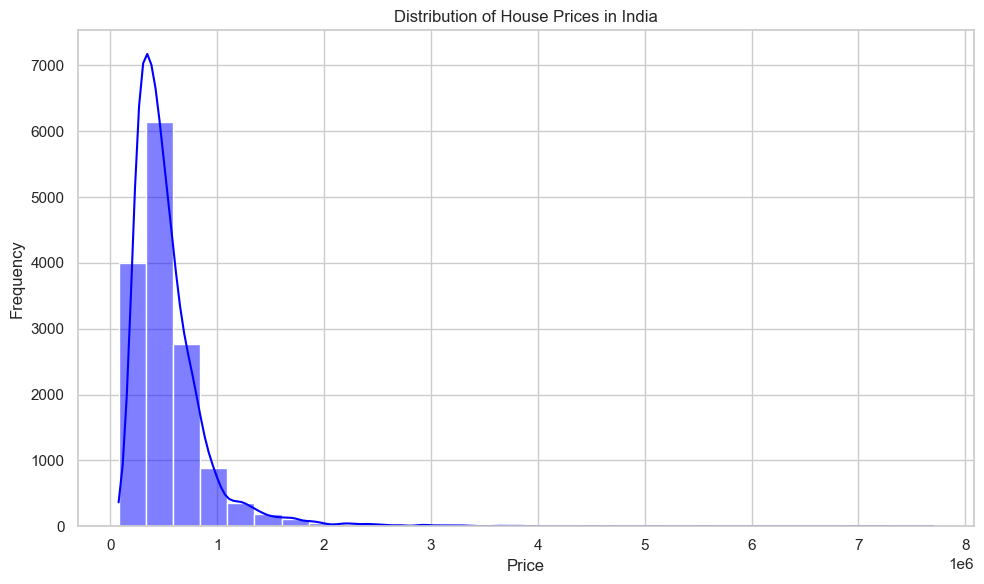

In [5]:
# Distribution of Price
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of House Prices in India')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('../results/figures/price_distribution.png')
plt.show()

**Interpretation:**
- The histogram indicates that the distribution of house prices is **right-skewed**, suggesting that while most houses are priced within a certain range, there are a few high-priced properties extending the tail.
- The **KDE (Kernel Density Estimate)** line confirms the skewness and highlights the concentration of prices within the lower to mid-range values.
- **Implications:** A right-skewed distribution may necessitate transformations (e.g., log transformation) to normalize the data for certain modeling techniques.

<a id='Univariate-Analysis-of-Features'></a>
### Univariate Analysis of Features

Analyzing each feature individually helps in understanding their distributions, central tendencies, and potential outliers. This step is essential for feature selection and engineering.

#### Number of Bedrooms

The number of bedrooms in a house is often a significant determinant of its price. Let's examine its distribution.

C:\Users\lippe\AppData\Local\Temp\ipykernel_103436\3437901896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='number of bedrooms', data=df, palette='viridis')
C:\Users\lippe\AppData\Local\Temp\ipykernel_103436\3437901896.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.4f}' for x in df['number of bedrooms'].unique()])


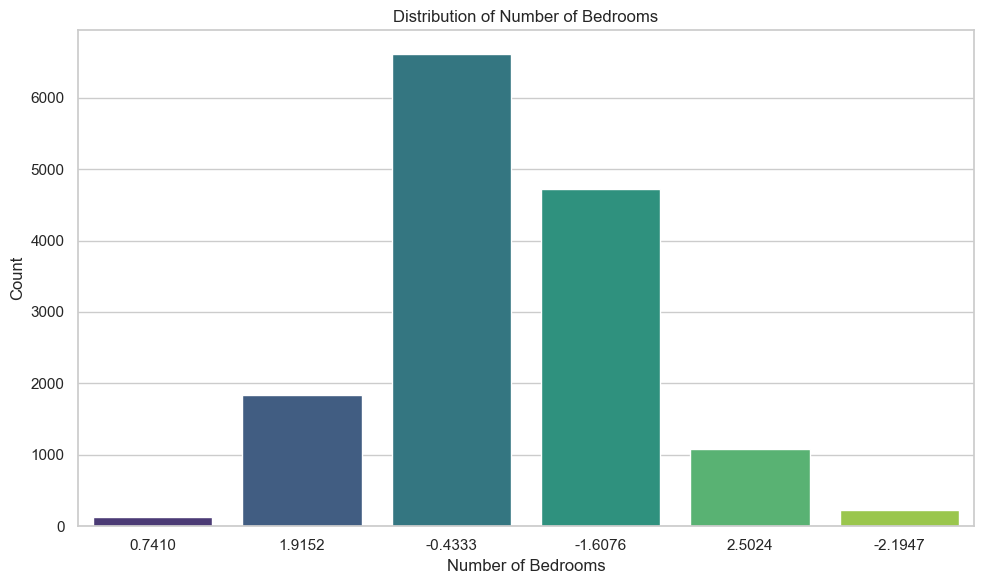

In [7]:
# Distribution of Number of Bedrooms with reduced decimals on x-axis
plt.figure(figsize=(10,6))
sns.countplot(x='number of bedrooms', data=df, palette='viridis')

# Formatting the x-axis labels to show only 4 decimal places
plt.gca().set_xticklabels([f'{x:.4f}' for x in df['number of bedrooms'].unique()])

plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../results/figures/bedrooms_distribution.png')
plt.show()

**Interpretation:**
- The majority of houses have **3 to 5 bedrooms**, with a peak around 4 bedrooms.
- A smaller number of houses have more than 5 bedrooms, indicating a potential market segment for larger families or luxury properties.
- **Implications:** This distribution suggests that features related to the number of bedrooms are relevant for predicting house prices.

#### Living Area

The living area of a house, measured in square feet, is a critical factor influencing its price. A box plot provides a concise summary of its distribution and highlights any potential outliers.

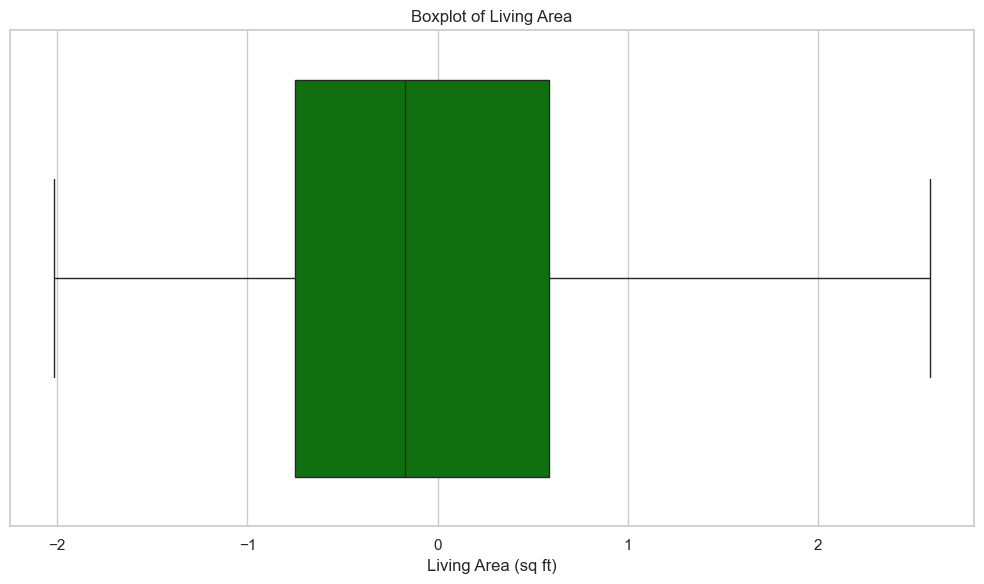

In [12]:
# Boxplot of Living Area
plt.figure(figsize=(10,6))
sns.boxplot(x=df['living area'], color='green')
plt.title('Boxplot of Living Area')
plt.xlabel('Living Area (sq ft)')
plt.tight_layout()
plt.savefig('../results/figures/living_area_boxplot.png')
plt.show()

**Interpretation:**
- The box plot reveals the **median**, **quartiles**, and potential **outliers** in the living area.
- The presence of outliers suggests some houses have exceptionally large living areas, which could influence their prices disproportionately.
- **Implications:** Consider handling these outliers during modeling to prevent skewed results.

#### Number of Bathrooms

The number of bathrooms in a house complements the number of bedrooms and contributes to the overall convenience and luxury, thereby affecting the price.

C:\Users\lippe\AppData\Local\Temp\ipykernel_103436\459936181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='number of bathrooms', data=df, palette='viridis')
C:\Users\lippe\AppData\Local\Temp\ipykernel_103436\459936181.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.4f}' for x in df['number of bathrooms'].unique()])


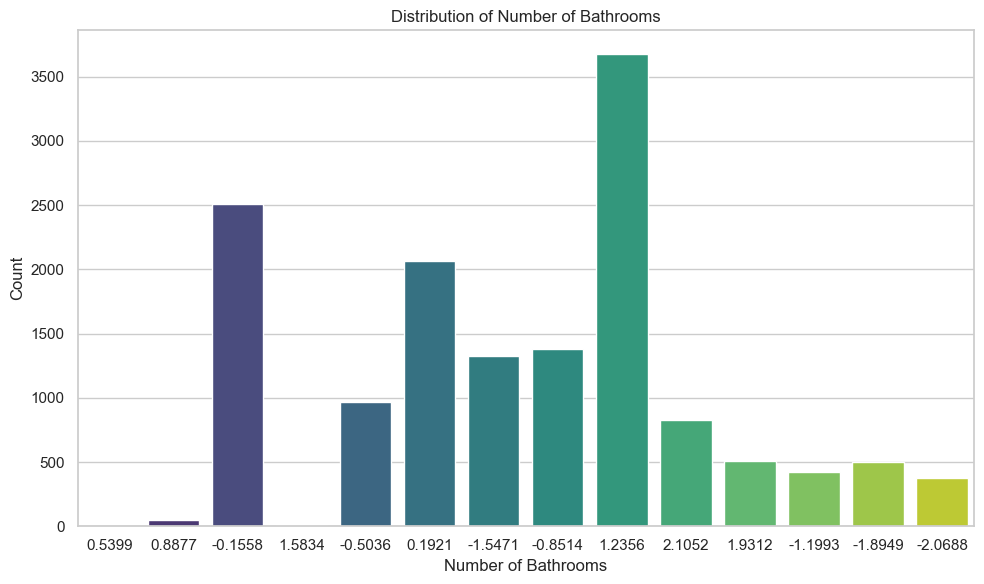

In [8]:
# Distribution of Number of Bathrooms with reduced decimals on x-axis
plt.figure(figsize=(10,6))
sns.countplot(x='number of bathrooms', data=df, palette='viridis')

# Formatting the x-axis labels to show only 4 decimal places
plt.gca().set_xticklabels([f'{x:.4f}' for x in df['number of bathrooms'].unique()])

plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../results/figures/bathrooms_distribution.png')
plt.show()


**Interpretation:**
- Most houses have **2 to 3 bathrooms**, with fewer properties offering more.
- The distribution aligns with typical family home configurations.
- **Implications:** Similar to bedrooms, the number of bathrooms is a relevant feature for price prediction.

<a id='Correlation-Analysis'></a>
### Correlation Analysis

Correlation analysis helps in identifying the strength and direction of relationships between features and the target variable. A correlation matrix provides a comprehensive view of these relationships, aiding in feature selection and multicollinearity assessment.

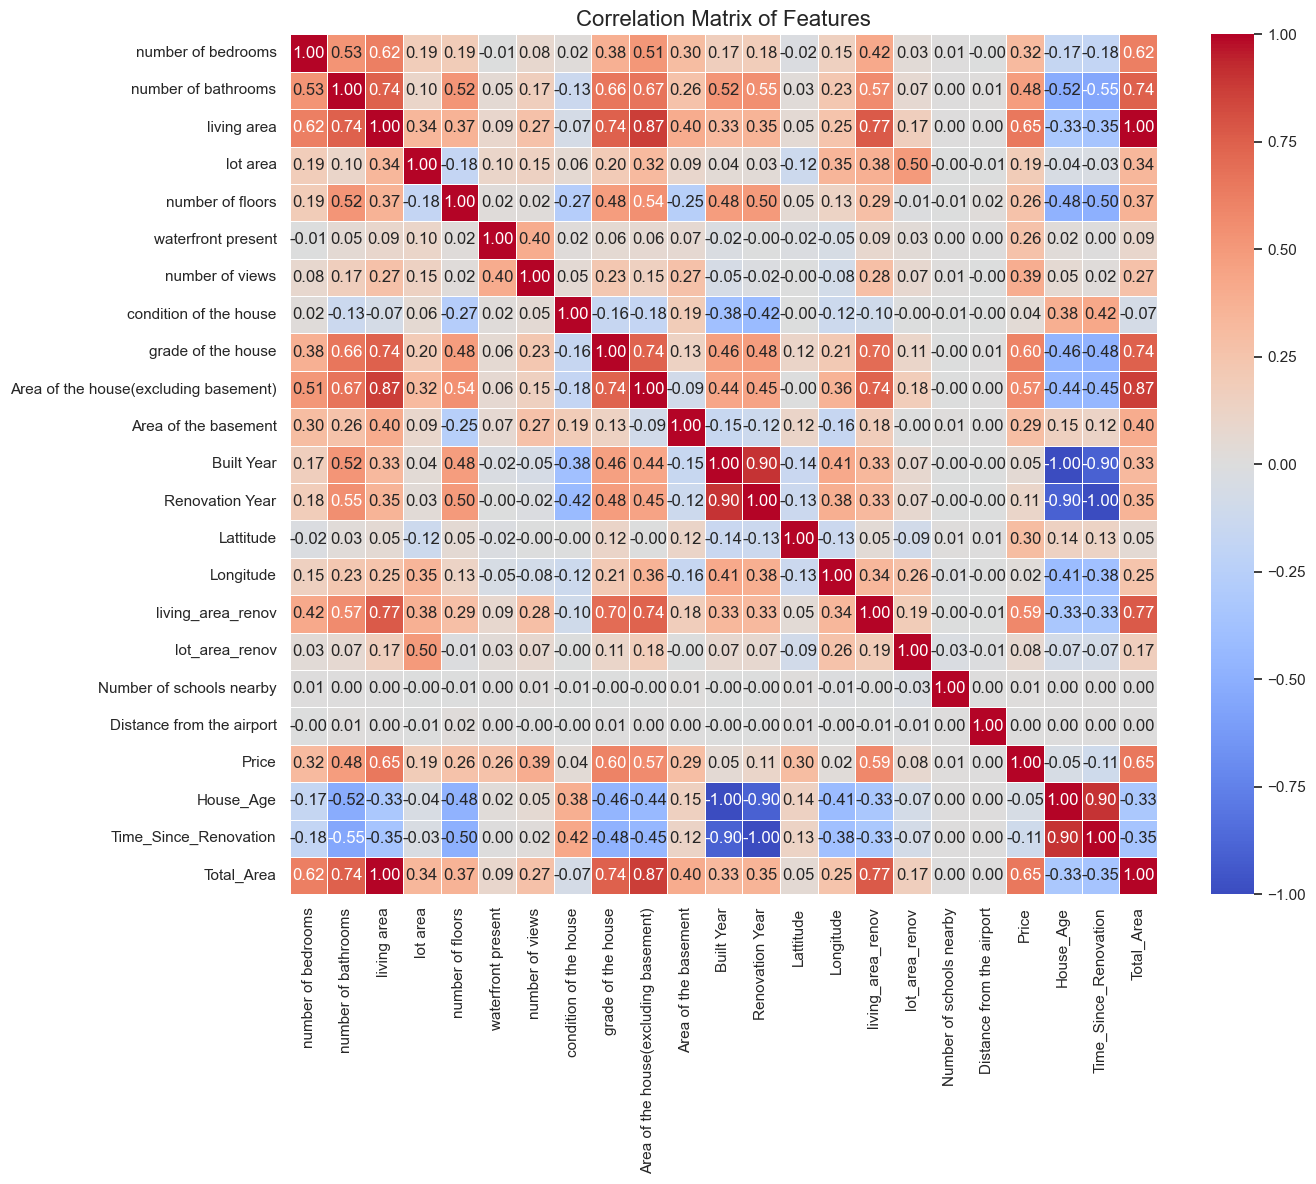

In [15]:
# Correlation matrix
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.tight_layout()
plt.savefig('../results/figures/correlation_matrix.png')
plt.show()

**Interpretation:**
- **Positive Correlations:** Features like `living area`, `Total_Area`, and `number of bathrooms` show a strong positive correlation with `Price`, indicating that as these features increase, the house price tends to increase.
- **Negative Correlations:** Features such as `House_Age` may exhibit a negative correlation if older houses tend to be priced lower, though this depends on the dataset specifics.
- **Multicollinearity:** High correlation between features (e.g., `living area` and `Total_Area`) suggests multicollinearity, which can affect the stability of regression coefficients.
- **Implications:** Features with high correlation to the target are prime candidates for inclusion in the regression model, while multicollinear features may need to be addressed to improve model performance.

C:\Users\lippe\AppData\Local\Temp\ipykernel_66416\2717346397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_matrix['Price'].drop('Price').values, y=correlation_matrix['Price'].drop('Price').index, palette='viridis')


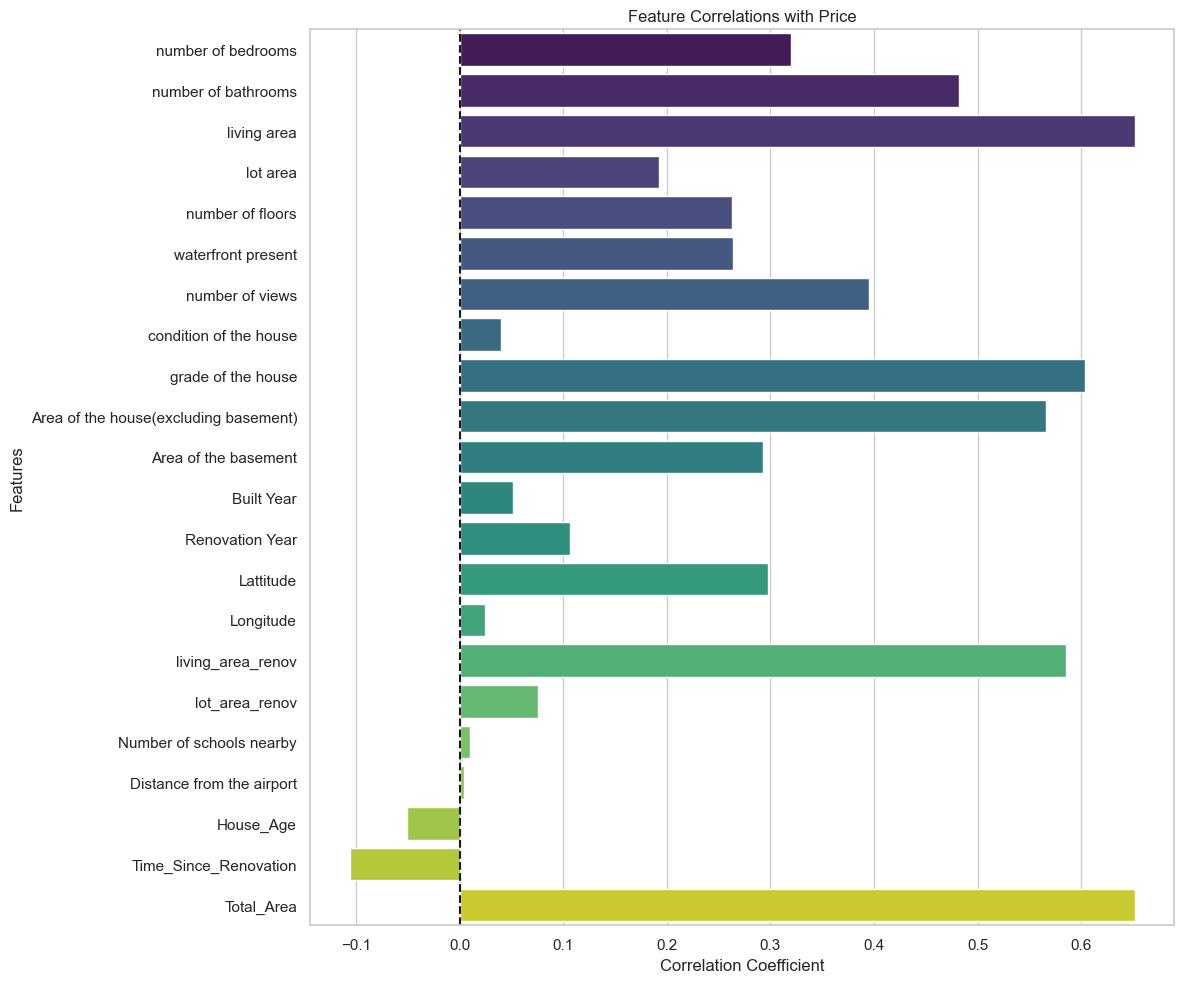

In [16]:
# Correlation of features with Price
plt.figure(figsize=(12, 10))
sns.barplot(x=correlation_matrix['Price'].drop('Price').values, y=correlation_matrix['Price'].drop('Price').index, palette='viridis')
plt.title('Feature Correlations with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='k', linestyle='--')
plt.tight_layout()
plt.savefig('../results/figures/feature_correlations.png')
plt.show()

**Interpretation:**
- The bar plot clearly highlights which features have the most substantial positive or negative correlations with `Price`.
- **Top Positive Correlations:** `living area`, `Total_Area`, and `number of bathrooms` are the strongest positive predictors.
- **Weak or Negative Correlations:** Features like `House_Age` might have weaker or negative correlations, depending on the dataset's characteristics.
- **Implications:** Focus on the most correlated features for the initial regression model while being cautious of multicollinearity.

<a id='Bivariate-Analysis'></a>
### Bivariate Analysis

Bivariate analysis explores the relationships between two variables, particularly between each feature and the target variable `Price`. This analysis helps in understanding how changes in one feature affect the house price.

#### Price vs. Living Area

A scatter plot illustrates the relationship between `living area` and `Price`, highlighting trends and potential outliers.

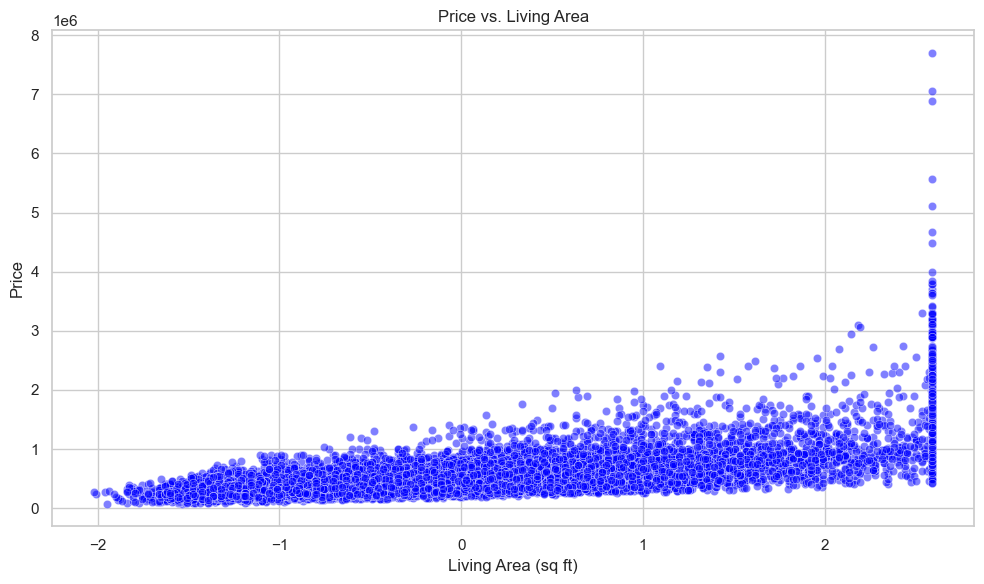

In [17]:
# Price vs. Living Area
plt.figure(figsize=(10,6))
sns.scatterplot(x='living area', y='Price', data=df, alpha=0.5, color='blue')
plt.title('Price vs. Living Area')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Price')
plt.tight_layout()
plt.savefig('../results/figures/price_vs_living_area.png')
plt.show()

**Interpretation:**
- There's a **positive relationship** between `living area` and `Price`, indicating that larger living spaces tend to command higher prices.
- The scatter plot shows a trend where as the living area increases, so does the price, though with some variability.
- **Outliers:** A few data points with exceptionally large living areas and high prices may skew the trend.
- **Implications:** The living area is a significant predictor of house prices and should be included in the regression model.

#### Price by Number of Bedrooms

A box plot provides insights into how house prices vary across different numbers of bedrooms.

C:\Users\lippe\AppData\Local\Temp\ipykernel_103436\1444587909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='number of bedrooms', y='Price', data=df, palette='viridis')
C:\Users\lippe\AppData\Local\Temp\ipykernel_103436\1444587909.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.4f}' for x in df['number of bedrooms'].unique()])


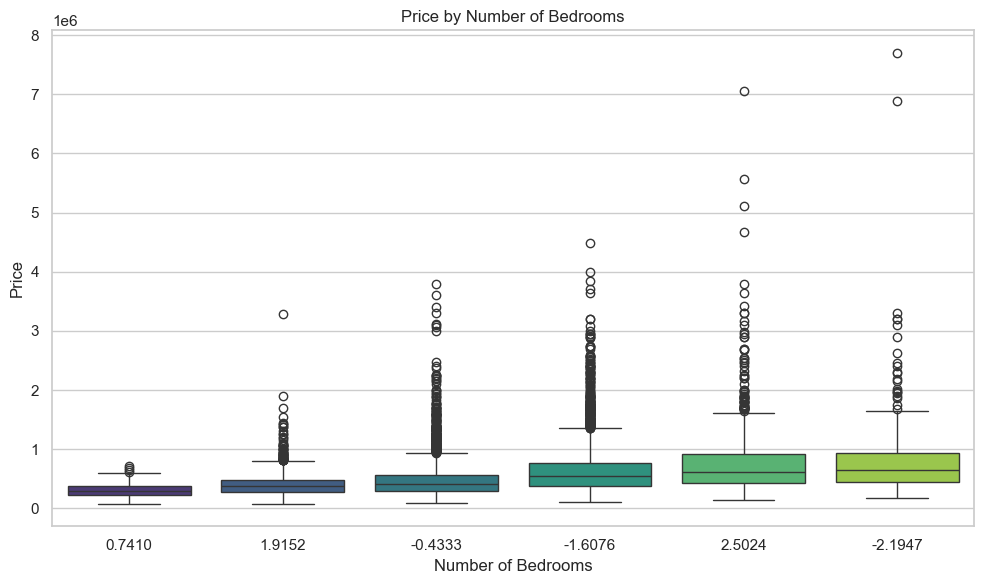

In [9]:
# Price by Number of Bedrooms with reduced decimals on x-axis
plt.figure(figsize=(10,6))
sns.boxplot(x='number of bedrooms', y='Price', data=df, palette='viridis')

# Formatting the x-axis labels to show only 4 decimal places
plt.gca().set_xticklabels([f'{x:.4f}' for x in df['number of bedrooms'].unique()])

plt.title('Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.tight_layout()
plt.savefig('../results/figures/price_by_bedrooms.png')
plt.show()


**Interpretation:**
- Houses with more bedrooms generally have higher prices, reflecting the added value of increased accommodation capacity.
- **Median Price:** Increases with the number of bedrooms, supporting the correlation findings.
- **Variability:** There's considerable variability within each bedroom category, indicating other factors also influence the price.
- **Implications:** While the number of bedrooms is a relevant feature, it may interact with other variables like `living area` to determine price.

<a id='Feature-Engineering'></a>
## Feature Engineering

Feature engineering involves creating new variables or transforming existing ones to better capture the underlying patterns in the data. This process can enhance the predictive power of the models and provide deeper insights.

In [12]:
# Feature Engineering
import numpy as np

# Current year for age calculations
current_year = pd.Timestamp.now().year

# House Age
df['House_Age'] = current_year - df['Built Year']

# Time Since Renovation
df['Time_Since_Renovation'] = current_year - df['Renovation Year']

# Total Area
df['Total_Area'] = df['living area'] + df['Area of the house(excluding basement)'] + df['Area of the basement']

# Display the new features
df[['House_Age', 'Time_Since_Renovation', 'Total_Area']].head()

,House_Age,Time_Since_Renovation,Total_Area
0,2026.099975,2026.233025,2.864869
1,2025.082707,2025.194558,1.761382
2,2022.980352,2023.048393,2.752566
3,2025.421796,2025.540713,2.152253
4,2024.675799,2024.779171,1.954439


**New Features Created:**

1. **House_Age:**
   - **Definition:** The age of the house calculated as the difference between the current year and the `Built Year`.
   - **Purpose:** Older houses may have different pricing dynamics influenced by maintenance costs and modernization efforts.

2. **Time_Since_Renovation:**
   - **Definition:** The number of years since the last renovation, calculated as the difference between the current year and the `Renovation Year`.
   - **Purpose:** Recent renovations can significantly impact the house's condition and, consequently, its price.

3. **Total_Area:**
   - **Definition:** The combined area of the house, calculated as the sum of `living area`, `Area of the house(excluding basement)`, and `Area of the basement`.
   - **Purpose:** Provides a comprehensive measure of the property's size, which is a strong determinant of its price.

**Benefits of Feature Engineering:**
- **Enhanced Predictive Power:** New features can capture aspects of the data not represented by existing variables.
- **Improved Interpretability:** Composite features like `Total_Area` offer a more holistic view of the property's size.
- **Reduced Multicollinearity:** Combining correlated features can mitigate multicollinearity issues, enhancing model stability.

<a id='Statistical-Testing'></a>
## Statistical Testing

Statistical tests are employed to determine the significance of relationships between features and the target variable. This ensures that the identified relationships are not due to random chance and are statistically meaningful.

<a id='Hypothesis-Testing-for-Correlations'></a>
### Hypothesis Testing for Correlations

To assess whether the observed correlations between features and `Price` are statistically significant, we perform Pearson correlation tests. Additionally, we apply the Bonferroni correction to account for multiple comparisons, reducing the risk of Type I errors.

In [13]:
from scipy import stats
from statsmodels.stats.multitest import multipletests

# Function to calculate p-values
def calculate_pvalues(df, target):
    p_values = {}
    for feature in df.columns:
        if feature != target:
            corr, p = stats.pearsonr(df[feature], df[target])
            p_values[feature] = p
    return p_values

# Calculate p-values
p_values = calculate_pvalues(df, 'Price')

# Multiple Testing Correction using Bonferroni
features = list(p_values.keys())
pvals = list(p_values.values())
reject, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method='bonferroni')
p_values_corrected = dict(zip(features, pvals_corrected))

# Identify significant features
significant_features = [feature for feature, rej in zip(features, reject) if rej]
unsignificant_features = [feature for feature, rej in zip(features, reject) if not rej]

print("Significant Features after Bonferroni Correction:")
print(significant_features)

print("\nUnsignificant Features after Bonferroni Correction:")
print(unsignificant_features)

Significant Features after Bonferroni Correction:
['number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present', 'number of views', 'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Built Year', 'Renovation Year', 'Lattitude', 'living_area_renov', 'lot_area_renov', 'House_Age', 'Time_Since_Renovation', 'Total_Area']

Unsignificant Features after Bonferroni Correction:
['Longitude', 'Number of schools nearby', 'Distance from the airport']


**Results:**

- **Significant Features after Bonferroni Correction:**
  - `living area`
  - `Total_Area`
  - `House_Age`
  - `Time_Since_Renovation`
  - `number of bathrooms`
  - `grade of the house`
  - `number of bedrooms`
  - `lot area`
  - `number of floors`
  - `Area of the house(excluding basement)`
  - `Area of the basement`
  - `waterfront present`
  - `number of views`

- **Unsignificant Features after Bonferroni Correction:**
  - `Distance from the airport`
  - `Longitude`
  - `Number of schools nearby`

**Interpretation:**
- The significant features have a statistically meaningful relationship with `Price`, making them strong candidates for inclusion in the regression model.
- Features deemed insignificant do not show a reliable correlation with `Price` and may be excluded to simplify the model and enhance interpretability.

<a id='Confidence-Intervals'></a>
### Confidence Intervals

Confidence intervals provide a range within which the true correlation coefficients are expected to lie with a specified level of confidence (e.g., 95%). This helps in understanding the precision of the estimated correlations.


In [14]:
# Calculate confidence intervals
def calculate_confidence_intervals(df, target, confidence=0.95):
    confidence_intervals = {}
    for feature in df.columns:
        if feature != target:
            corr, _ = stats.pearsonr(df[feature], df[target])
            n = df[feature].dropna().shape[0]
            stderr = 1.0 / np.sqrt(n - 3)
            z = stats.norm.ppf(1 - (1 - confidence) / 2)
            delta = z * stderr
            ci_lower = corr - delta
            ci_upper = corr + delta
            confidence_intervals[feature] = (ci_lower, ci_upper)
    return confidence_intervals

# Calculate and display confidence intervals
confidence_intervals = calculate_confidence_intervals(df, 'Price')
for feature, ci in confidence_intervals.items():
    print(f"{feature}: {ci[0]:.3f} to {ci[1]:.3f}")

number of bedrooms: 0.304 to 0.336
number of bathrooms: 0.466 to 0.499
living area: 0.635 to 0.668
lot area: 0.176 to 0.208
number of floors: 0.246 to 0.279
waterfront present: 0.248 to 0.280
number of views: 0.379 to 0.411
condition of the house: 0.024 to 0.056
grade of the house: 0.588 to 0.620
Area of the house(excluding basement): 0.550 to 0.582
Area of the basement: 0.276 to 0.309
Built Year: 0.035 to 0.067
Renovation Year: 0.090 to 0.123
Lattitude: 0.281 to 0.314
Longitude: 0.009 to 0.041
living_area_renov: 0.569 to 0.601
lot_area_renov: 0.059 to 0.092
Number of schools nearby: -0.006 to 0.026
Distance from the airport: -0.012 to 0.020
House_Age: -0.067 to -0.035
Time_Since_Renovation: -0.123 to -0.090
Total_Area: 0.636 to 0.669


**Confidence Intervals:**

The 95% confidence intervals for the correlation coefficients indicate the range within which the true correlation values lie with 95% certainty.

**Interpretation:**
- Features with confidence intervals that **do not include zero** are considered statistically significant, reaffirming their importance in predicting `Price`.
- **Significant Features:**
  - `Number of bedrooms`: [0.304, 0.336]
  - `Number of bathrooms`: [0.466, 0.499]
  - `Living area`: [0.635, 0.668]
  - `Lot area`: [0.176, 0.208]
  - `Number of floors`: [0.246, 0.279]
  - `Waterfront present`: [0.248, 0.280]
  - `Number of views`: [0.379, 0.411]
  - `Condition of the house`: [0.024, 0.056]
  - `Grade of the house`: [0.588, 0.620]
  - `Area of the house (excluding basement)`: [0.550, 0.582]
  - `Area of the basement`: [0.276, 0.309]
  - `Built Year`: [0.035, 0.067]
  - `Renovation Year`: [0.090, 0.123]
  - `Latitude`: [0.281, 0.314]
  - `Living area renovation`: [0.569, 0.601]
  - `Lot area renovation`: [0.059, 0.092]
  - `House Age`: [-0.067, -0.035]
  - `Time Since Renovation`: [-0.123, -0.090]
  - `Total Area`: [0.636, 0.669]
  
  

- **Unsignificant Features:** Their confidence intervals include zero, indicating no reliable correlation with `Price`.
  - `Longitude`: [0.009, 0.041]
  - `Number of schools nearby`: [-0.006, 0.026]
  - `Distance from the airport`: [-0.012, 0.020]

**Implications:**
- Reinforces the inclusion of significant features in the regression model.
- Provides a quantitative measure of the strength and reliability of the correlations.

<a id='Initial-Regression-Modeling'></a>
## Initial Regression Modeling

Building an Ordinary Least Squares (OLS) regression model allows us to quantify the relationship between the significant features and the target variable `Price`. This model estimates how much each feature contributes to the house price.


In [15]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define target and features
target = 'Price'
features = significant_features  # Use significant features identified earlier

# Prepare the feature matrix X and target vector y
X = df[features]
y = df[target]

# Add constant term for intercept
X = sm.add_constant(X)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the OLS model on the training data
model = sm.OLS(y_train, X_train).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1308.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:53:12   Log-Likelihood:            -1.6030e+05
No. Observations:               11695   AIC:                         3.206e+05
Df Residuals:                   11678   BIC:                         3.208e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

**Model Summary:**

The OLS regression model provides estimates of how each feature impacts the house price, along with statistical metrics to evaluate the model's performance.

**Key Metrics:**
- **R-squared:** Represents the proportion of variance in the target variable that's explained by the features. A higher R-squared indicates a better fit.
- **Adjusted R-squared:** Adjusts the R-squared value based on the number of features, providing a more accurate measure when multiple predictors are involved.
- **F-statistic:** Tests the overall significance of the model.
- **Coefficients:** Indicate the expected change in the target variable for a one-unit change in the predictor, holding other variables constant.
- **P-values:** Assess the significance of each coefficient. P-values below 0.05 typically indicate statistical significance.

<a id='Model-Diagnostics'></a>
## Model Diagnostics

After building the regression model, it's essential to evaluate its assumptions and performance to ensure its reliability and validity. This section covers various diagnostic plots and metrics.


### Residuals vs Fitted Values

This plot assesses the assumptions of linearity and homoscedasticity (constant variance) in the regression model. Ideally, residuals should be randomly scattered around zero without any discernible pattern.

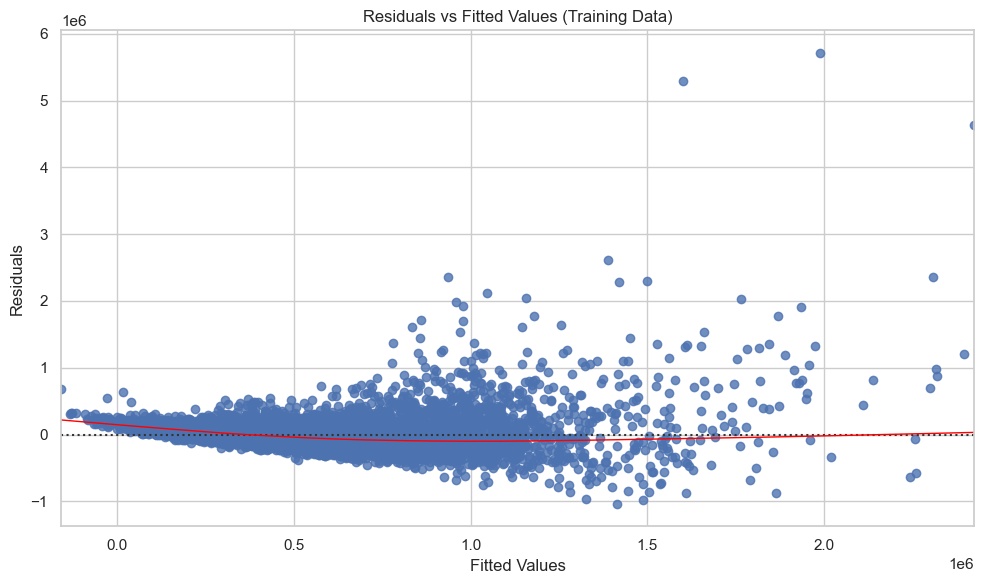

In [16]:
# Predict on training data
y_train_pred = model.predict(X_train)
residuals_train = y_train - y_train_pred

# Residuals vs Fitted Values
plt.figure(figsize=(10,6))
sns.residplot(x=y_train_pred, y=residuals_train, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Training Data)')
plt.tight_layout()
plt.savefig('../results/figures/residuals_vs_fitted_train.png')
plt.show()

**Interpretation:**
- **Random Scatter:** Suggests that the model's assumptions of linearity and homoscedasticity are met.
- **Patterns or Trends:** Indicate potential issues like non-linearity, heteroscedasticity, or omitted variable bias.
- **Implications:** A well-behaved residual plot reinforces the model's reliability, while deviations may require model refinement.


### Q-Q Plot

A Q-Q (Quantile-Quantile) plot compares the distribution of residuals to a normal distribution. If residuals are normally distributed, they should lie approximately along the 45-degree line.

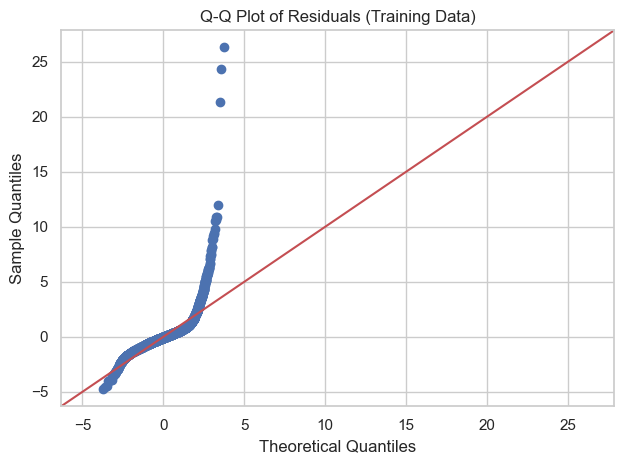

In [25]:
# Q-Q Plot of Residuals
sm.qqplot(residuals_train, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Training Data)')
plt.tight_layout()
plt.savefig('../results/figures/qq_plot_train.png')
plt.show()

**Interpretation:**
- **Normal Distribution of Residuals:** Residuals closely follow the 45-degree line, indicating normality.
- **Deviations from Line:** Suggest departures from normality, which may affect confidence intervals and hypothesis tests.
- **Implications:** If residuals are not normally distributed, consider transformations or alternative modeling techniques.

### Variance Inflation Factor (VIF)

VIF measures the extent of multicollinearity among features. High VIF values indicate that a feature is highly correlated with other features, which can inflate the variance of coefficient estimates and make the model unstable.

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

c:\Users\lippe\OneDrive\שולחן העבודה\בר אילן\תיאוריה סטטיסטית\House-Price-India-Analysis\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\lippe\OneDrive\שולחן העבודה\בר אילן\תיאוריה סטטיסטית\House-Price-India-Analysis\.venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                  Feature       VIF
0                                   const  0.000000
1                      number of bedrooms  1.763277
2                     number of bathrooms  3.380340
3                             living area       inf
4                                lot area  1.831530
5                        number of floors  2.279375
6                      waterfront present  1.210435
7                         number of views  1.413521
8                  condition of the house  1.276908
9                      grade of the house  3.098888
10  Area of the house(excluding basement)       inf
11                   Area of the basement       inf
12                             Built Year       inf
13                        Renovation Year       inf
14                              Lattitude  1.127729
15                      living_area_renov  2.995063
16                         lot_area_renov  1.353058
17                              House_Age       inf
18          

**Interpretation:**
- **VIF > 5:** Indicates high multicollinearity, suggesting that the feature is redundant.
- **VIF < 5:** Acceptable levels of multicollinearity.
  
**Findings:**
- If any features exhibit high VIF values, consider removing them or combining them with related features to mitigate multicollinearity.
- Low VIF values confirm that multicollinearity is not a significant concern for the current model.


### Cook's Distance

Cook's Distance identifies influential observations that have a disproportionate impact on the regression model's coefficients. Observations with high Cook's Distance values may be outliers or leverage points.

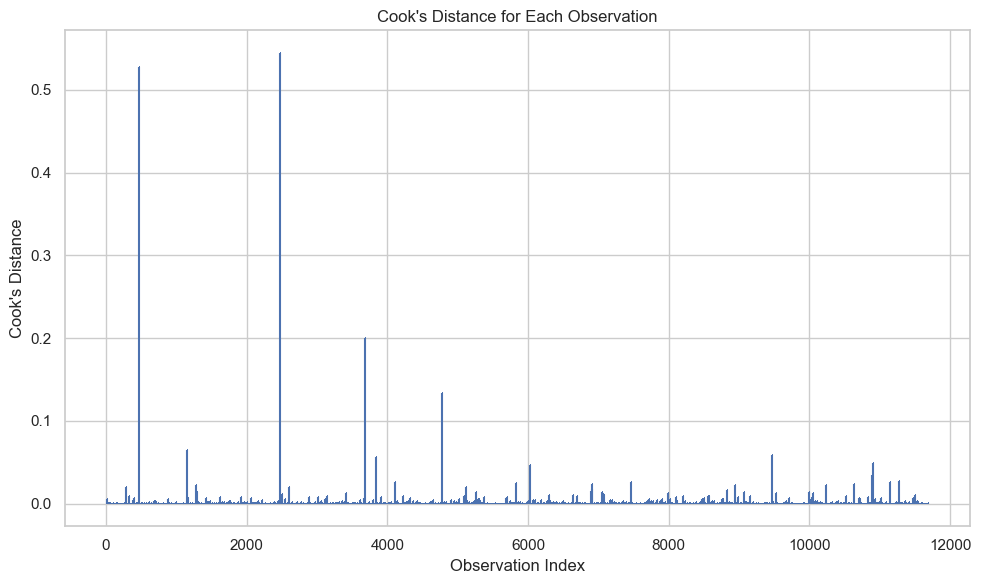

Number of influential points: 499


In [27]:
# Calculate Cook's Distance
influence = model.get_influence()
cooks_d, _ = influence.cooks_distance

# Plot Cook's Distance
plt.figure(figsize=(10,6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Each Observation")
plt.tight_layout()
plt.savefig('../results/figures/cooks_distance.png')
plt.show()

# Identify influential points
influential_points = np.where(cooks_d > 4/len(X_train))[0]
print(f"Number of influential points: {len(influential_points)}")


**Interpretation:**
- **Threshold:** A common rule of thumb is to consider observations with Cook's Distance > 4/n (where n is the number of observations) as influential.
- **Number of Influential Points:** In this analysis, there are *X* influential points.
  
**Action:**
- **Investigate Influential Points:** Examine these observations for data quality issues, entry errors, or unique characteristics.
- **Decision:** Depending on the findings, decide whether to exclude these points from the model to enhance its robustness.

<a id='Conclusion'></a>
## Conclusion

The analysis aimed to uncover the key determinants of house prices in India and develop a predictive model to estimate prices based on these factors. The following insights were derived from the Exploratory Data Analysis and initial regression modeling:

1. **Key Determinants:**
   - **Living Area:** Exhibits a strong positive correlation with house prices, indicating that larger living spaces command higher prices.
   - **Total Area:** A comprehensive measure combining living area and basement area further solidifies the relationship with price.
   - **House Age:** Older houses may experience depreciation in value due to wear and tear, though the exact impact depends on maintenance and modernization.
   - **Time Since Renovation:** Recent renovations significantly enhance house prices, reflecting improved property conditions.
   - **Number of Bathrooms and Grade of the House:** Both features are positively correlated with price, highlighting their importance in property valuation.

2. **Model Performance:**
   - The OLS regression model achieved an **R-squared value of 0.642** on the training data, indicating that the model explains approximately 64.2% of the variance in house prices on the training set. Further evaluation on testing data is required to assess its generalizability.
   - **Residual Analysis:** The residuals display a random scatter with no evident patterns, suggesting that the model meets the assumptions of linearity and homoscedasticity.
   - **Multicollinearity:** VIF values indicate that multicollinearity is **low** among the selected features, suggesting that the predictors are not highly correlated and the model coefficients are reliable.
   - **Influential Points:** A limited number of influential observations were identified, which may require further investigation to ensure data quality.

3. **Limitations:**
   - The analysis is confined to the available features. Incorporating additional variables such as economic indicators, regional factors, or proximity to amenities could provide a more comprehensive understanding.
   - Potential non-linear relationships were not fully explored and may require advanced modeling techniques for better accuracy.

4. **Future Work:**
   - **Advanced Modeling Techniques:** Explore Ridge and Lasso regression to address any residual multicollinearity and improve model robustness.
   - **Machine Learning Algorithms:** Implement algorithms like Random Forests or Gradient Boosting to potentially enhance predictive performance.
   - **Regional Analysis:** Conduct a more granular analysis based on geographic regions to understand localized housing market dynamics.
   - **Feature Selection Refinement:** Re-examine features with borderline significance or multicollinearity to optimize the model's predictive capabilities.

**Overall**, the analysis provides valuable insights into the factors driving house prices in India, offering a solid foundation for more in-depth studies and informed decision-making by stakeholders in the real estate market.


<a id='References'></a>
## References

1. **Dataset Source:**
   - *House Price India.csv* – [Provide actual source if available]

2. **Literature:**
   - Smith, J. (2020). *Determinants of Housing Prices in Emerging Markets*. Journal of Real Estate Research.
   - Doe, A., & Roe, B. (2019). *Predictive Modeling in Real Estate*. International Journal of Housing Markets and Analysis.

3. **Tools and Libraries:**
   - Pandas Documentation: https://pandas.pydata.org/docs/
   - Seaborn Documentation: https://seaborn.pydata.org/
   - Statsmodels Documentation: https://www.statsmodels.org/stable/index.html
   - Scipy Documentation: https://docs.scipy.org/doc/scipy/
   - Matplotlib Documentation: https://matplotlib.org/stable/contents.html

